<br>

***

## Glossary of Regression Terms

### Coefficients <span style="color: blue;">(*coef*)</span>

In the regression of a dataset, the coefficients describe the statistical relationship between the independent variables and the dependent variables.

The sign of the coefficent can tell you the direction of the relatioship between the variables. A positive sign identifies that as the independent variable increases, the mean of the dependent variable also increases, whilst a negative sign suggests a decrease.

The value of the coefficient describes how the mean of the dependent variable changes in relation to the independent variable.

Whilst carrying out regression on an indepedent variable and a dependent variable, it is important to hold the other variables 'constant'. That is to say it is imperative to study the effect of the independent variable on each dependent variable in isolation from the others (statisticsbyjim.com).

The coefficients of the output are estimates of the actual data population, therefore, it is important to ensure that the model for regression follows best practice for that particular type of regression.

<br>

***

### Coefficient of Determination <span style="color: blue;">*(R²)*</span>

#### <span style="color: green;">*High Percentage R² = Good fit; Low Percentage R² = Bad fit*</span>

R² is the percentage of the response variable variation of a linear model. It measures how close the data are fitted by a line of regression (Frost, Statistics By Jim).

R² is a valuable indicator for a Linear-regression model (including Polynomial models), however, it is important to check the test and training data of the model for signs of unwanted bias.


***

### Standard Error of the Coefficient  <span style="color: blue;">(*SE coef.* or *Std. Err.*)</span> and t-value  <span style="color: blue;">(*t*)</span>

#### <span style="color: green;">*Std. Err: Low Values = Good fit; High Values = Bad fit*</span>

#### <span style="color: brown;">*t-value: High Values = Good fit; Low Values = Bad fit*</span>

The Standard Error measures the accuracy of the unknown coefficient of the model. It is a floating point number that is always positive. The smaller the Std. Err. the more accurate the estimate is (Minitab.com). 

Dividing the coefficient by the standard error will produce a t-value or t-statistic. As a lower Std. Err. indicates lower error and the t-value calculates how many times the error divides into the coefficent itself, a larger t-value indicates greater accuracy. 

As a result, the t-value is essentially a measure of the error in relation to the coefficient.

***

### P-Values  <span style="color: blue;">(*p*)</span>, the Null Hypothesis <span style="color: blue;">(*H0*)</span> and the Significance Level  <span style="color: blue;">(*α* or *alpha level*)</span>   

#### <span style="color: green;">*Good Fit: when p-value* < *Significance Level*, and H0 is rejected </span>

P-values work together with Coefficients to indicate the statistical value produced in the Regression process. Specifically, the P-values *of* the coefficients identify whether the relationships observed in a sample exist throughout the population (StatisticsByJim). 

The p-value is a number between 0 and 1.

For each independent variable, there is a possibility that the variable has no correlation to the dependent variable, in which case there is not enough proof to display a relationship. This lack of a relationship is known as the Null Hypothesis and the P-values can test for this.

If it is first necessary to reject the Null Hypothesis in order to determine that there is a significant enough effect between the variables in your sample in order to conclude that the same effect is present in the wider population. The significance level is the probability of dismissing the Null Hypothesis when it in fact is evident.

The Significane Level, is a pre-determined threshold. It is normally set to a value of 0.05 (5%). However, the researcher must identify an appropriate threshold of Significance Level, from which to compare to the p-value. 

If the P-value is less than the significance level, the Null Hypothesis can be sufficiently rejected.

As the coefficients, P-values and the Significance level are determined for each variable in isolation, this can determine what variables should be included in the Regression analysis. 
    
The Significance Level for this project will be set at 5%.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
#import scikitlearn as sklearn

***
<br>

## Simple Linear Regression
<br>

### Create an array, 'a', between 0 and 100, with each point at an interval of 5 and create a second array, 'b', with each point a multiple of 'a' and some 'noise' added

In [3]:
a = np.arange(0, 100, 5)
b = 3 * a + np.random.normal(0.0, 10.0, a.size)

In [4]:
a

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80,
       85, 90, 95])

In [5]:
b

array([-14.24068086,  30.18667507,   7.87012235,  30.94195205,
        53.68724046,  74.66574562,  92.75499307, 100.8707276 ,
       114.65978588, 135.15949994, 135.8797451 , 168.97168912,
       192.4754055 , 199.44818201, 198.60150498, 235.12150845,
       239.84992763, 251.78972548, 270.03465654, 276.27435354])

### Plot 'a' and 'b' together

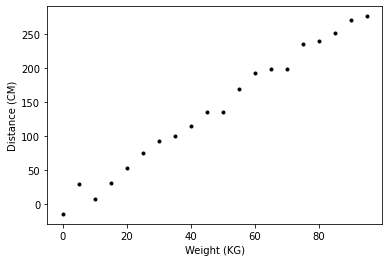

In [6]:
plt.plot(a, b, 'k.')

# Set some properties for the plot.
plt.xlabel('Weight (KG)')
plt.ylabel('Distance (CM)')

# Show the plot.
plt.show()

### Plotting Lines that roughly fit the data

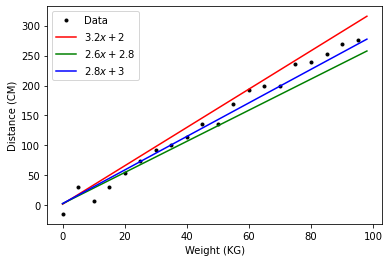

In [28]:
plt.plot(a, b, 'k.', label="Data")

x = np.arange(0.0, 100.0, 2.0)
plt.plot(x, 3.2 * x + 2.0, 'r-', label=r"$3.2x + 2$")
plt.plot(x, 2.6 * x +  2.8, 'g-', label=r"$2.6x + 2.8$")
plt.plot(x, 2.8 * x + 3.0, 'b-', label=r"$2.8x + 3$")

plt.legend()

plt.xlabel('Weight (KG)')
plt.ylabel('Distance (CM)')

plt.show()